In [2]:
import numpy as np

In [3]:
from envs.gridworldv2 import GridworldV2Env
from value_function_utils import visualize_grid_action_values, visualize_grid_state_values

In [33]:
def mc_predict(env, max_episodes):
    returns = {state: [] for state in env.distinct_states}
    grid_state_values = np.zeros(len(env.distinct_states))
    grid_state_values[env.goal_state] = 1
    grid_state_values[env.bomb_state] = -1
    gamma = 0.99

    for episodes in range(max_episodes):
        g_t = 0
        state = env.reset()
        done = False 
        trajectory = []
        
        while not done:
            action = env.action_space.sample() # random policy 
            next_state, reward, done = env.step(action)
            trajectory.append((state, reward))
            state = next_state 

        for idx, (state, reward) in enumerate(trajectory[::-1]):
            g_t = gamma * g_t + reward

            # first visit Monte-Carlo prediction
            if state not in np.array(trajectory[::-1])[:, 0][idx+1 :]:
                returns[str(state)].append(g_t)
                grid_state_values[state] = np.mean(returns[str(state)])
    
    visualize_grid_state_values(grid_state_values.reshape((3, 4)))

In [6]:
def epsilon_greedy(action_logits, epsilon=0.1):
    pass 

In [8]:
def mc_control(env, max_episodes):
    pass

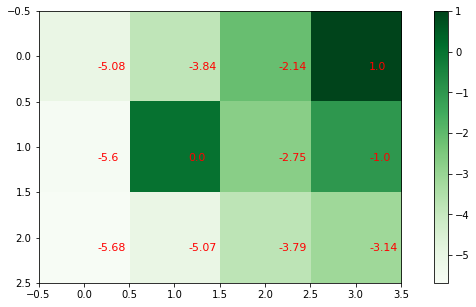

In [34]:
env = GridworldV2Env()

mc_predict(env, max_episodes=1000)